# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [3]:
# Notebooks specific imports
from IPython import get_ipython
ipython = get_ipython()
#Expand notebook display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# Basic useful imports
import re
import time
import yaml
from pprint import pprint
from pathlib import Path
import h5py

# Data manipulation
import numpy as np
from scipy.special import erf
from scipy.integrate import quad

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import (Circle, RegularPolygon, FancyArrowPatch, ArrowStyle)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullFormatter)
import matplotlib.colors as colors

### Style settings

In [4]:
graph_sty = {
    "axes.titlesize": 20,
    "axes.labelsize": 24,
    "lines.linewidth": 3,
    "lines.markersize": 10,
    "xtick.labelsize": 24,
    "ytick.labelsize": 24,
    "font.size": 20,
    "font.sans-serif": 'Helvetica',
    "text.usetex": False,
    'mathtext.fontset': 'cm',
}
plt.style.use(graph_sty)
        

# Functions

In [11]:
def free_energy_gauss_well(y, y_site, ks, well_depth, well_sigma):
    xi = y - y_site
    U_s = .5*ks*y*y
    U_w = -well_depth * np.exp(-.5*xi*xi/(well_sigma*well_sigma))
    return U_s +U_w

# Results/Graphs

In [31]:
#parameters
ks = 50.
y_site = 2.5
well_depth = 50.
well_sigma = .1


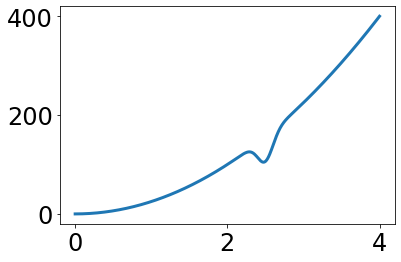

In [32]:
y_arr = np.linspace(0,4,500)
plt.plot(y_arr, free_energy_gauss_well(y_arr, y_site, ks, well_depth, well_sigma))

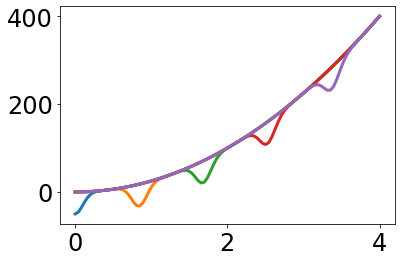

In [33]:
y_arr = np.linspace(0,4,100)
y_site_arr = np.linspace(0,4,20)

Y, S = np.meshgrid(y_arr, y_site_arr)
fe_mat = free_energy_gauss_well(Y, S, ks, well_depth, well_sigma)

for i in range(5):
    plt.plot(y_arr, fe_mat[i*4])

# Conclusions and Next Steps